# Dimension Reduction

- [Feature selection](#Feature-selection)
- [Feature extraction](#Feature-extraction)
    - [PCA](#PCA)
    - [ICA](#ICA)
    - [FA](#FA)
- Application: [tSNE](#tSNE)


In [2]:
%matplotlib inline

## Feature selection

Especially popular in SNP and gene expression studies, [feature selection](https://en.wikipedia.org/wiki/Feature_selection) contains a miriad of choices for selecting variables of interest. The module [sklearn.feature_selection](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) contains several feature selection possibilities, such as univariate filter selection methods and the recursive feature elimination. 

Another class of feature selection, [SelectFromModel](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html) is based on any estimator that can score features and order them by importance. Many sparse estimators such as Lasso, Logistic and Linear SVC can be used.

In [1]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
iris = load_iris()
X, y = iris.data, iris.target
print(X.shape)

# C controls the sparsity, try smaller for fewer features!
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)

model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
print(X_new.shape)

(150, 4)
(150, 3)


Rather than zeroing out on features, tree based estimators would compute feature importance.

In [2]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

iris = load_iris()
X, y = iris.data, iris.target
print(X.shape)

clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
print(clf.feature_importances_)

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print(X_new.shape)


(150, 4)
[0.08767476 0.08579156 0.29782085 0.52871282]
(150, 2)


Task:

- Use the [example](http://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_boston.html) below to fit a tree or a forest and compare results! (Tip: check the scikit learn documentation on feature selection)
- Evaluate your goodness of fit using the two feature selectors and compare!

Automatically created module for IPython interactive environment


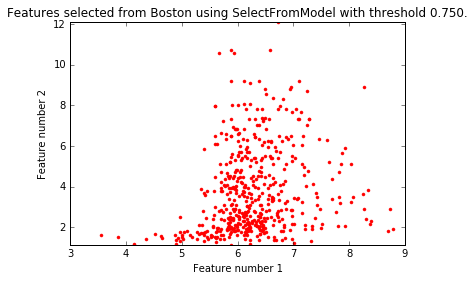

In [8]:
%matplotlib inline

print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# Load the boston dataset.
boston = load_boston()
X, y = boston['data'], boston['target']

# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
clf = LassoCV()

# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold=0.25)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]

# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
while n_features > 2:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]

# Plot the selected two features from X.
plt.title(
    "Features selected from Boston using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

In [10]:
print(boston.keys())
print(boston['feature_names'])
print(boston['DESCR'])



dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of acc

Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms. This is partly because linear modeling doesn't work well with data where feature present multiple linear dependencies (see[this](1) for more).

Three benefits of performing feature selection before modeling your data are:
- Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
- Improves Accuracy: Less misleading data means modeling accuracy improves.
- Reduces Training Time: Less data means that algorithms train faster.

[1]:https://courses.cs.washington.edu/courses/cse521/16sp/521-lecture-6.pdf

## Feature extraction

Rather than selecting features, FT creates an entirely new (transformed) feature space, having lower dimensionality.

https://en.wikipedia.org/wiki/Feature_extraction

## PCA 
## (Principal Component Analysis)

Many times our data is not full rank, which means that some variables repeat as a linear combination or others. PCA will transform the dataset into a number of uncorelated components. The first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to (i.e., uncorrelated with) the preceding components.

For a visual explanation look [here](https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/).

Mathematically, PCA is a linear transformation of a matrix $X(n,p)$ of $p$ features, defined by a set of $m$ $p$-dimensional vectors called **loadings** ${w}_{(k)} = (w_1, \dots, w_p)_{(k)}$ mapping each row vector of $X$ into a set of $m$ principal component **scores** ${t}_{(i)} = (t_1, \dots, t_m)_{(i)}$, given by

$${t_{k}}_{(i)} = {x}_{(i)} \cdot {w}_{(k)} \qquad \mathrm{for} \qquad i = 1,\dots,n \qquad k = 1,\dots,m $$

in such a way that the individual variables $t_1, \dots, t_m$ of $t$ considered over the data set successively inherit the maximum possible variance from $x$, with each loading vector $w$ constrained to be a unit vector. Numerically, there is a direct connection between the loading vectors and the spectral decomposition of the empirical covariance matrix $X^TX$ in that the first loading vector is the eigenvector with the largest eigenvalue in the transformation of the covariance matrix into a diagonal form.

With scikit-learn, PCA is part of the matrix decomposition module, and it is numerically solved via SVD decomposition. 

Shape of Iris dataset (150, 4)
Explained Variance:  [0.92461621 0.05301557 0.01718514]
Principal components [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]]
Shape of reduced dataset (150, 3)


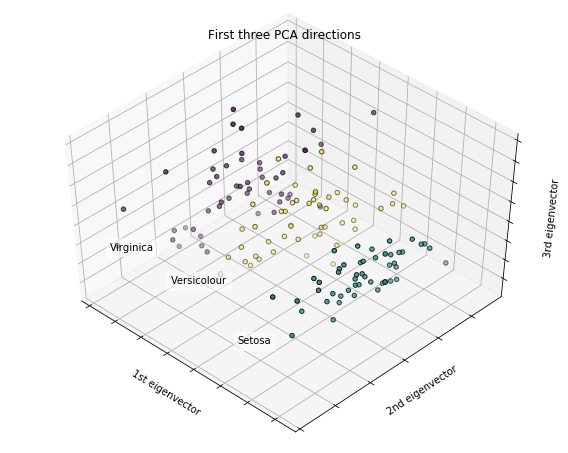

In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target
print("Shape of Iris dataset", iris.data.shape)

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
#ax = Axes3D(fig, elev=-150, azim=110)

# feature extraction
plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X_reduced = pca.transform(X)

# summarize components
print("Explained Variance: ", pca.explained_variance_ratio_)
print("Principal components", pca.components_)
print("Shape of reduced dataset", X_reduced.shape)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X_reduced[y == label, 0].mean(),
              X_reduced[y == label, 1].mean() + 1.5,
              X_reduced[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

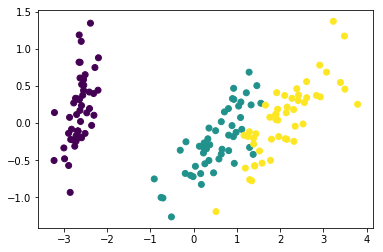

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y)

Task:
- How to make the score vs loadings biplots, similar to those in R? 
- How to compute the FA loadings/scores based on the principal components?

First of all, PCA is not necessarily a factor analysis subject, and the habit of using scores vs loadings doesn't exist or is different elsewhere. Finish the code bellow to add proper labels for the loadings, and compute the actual loadings.

Further read:
- https://arxiv.org/pdf/1404.1100.pdf
- https://stats.stackexchange.com/questions/119746/what-is-the-proper-association-measure-of-a-variable-with-a-pca-component-on-a/119758#119758
- https://stackoverflow.com/questions/21217710/factor-loadings-using-sklearn/28062715#28062715

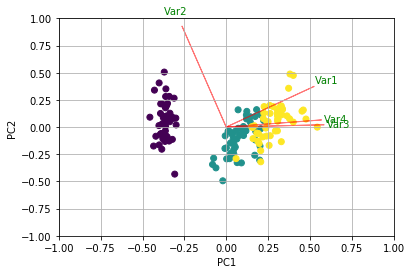

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data
y = iris.target

#In general a good idea is to scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    

pca = PCA()
x_new = pca.fit_transform(X)


def myplot(score,load,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = load.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, load[i,0], load[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(load[i,0]* 1.15, load[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(load[i,0]* 1.15, load[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

## ICA
### (Independent Component Analysis)

ICA is an algorithm that finds directions in the feature space corresponding to projections with high non-Gaussianity. 

Why:
- Many types of biological datasets are Gaussian rather then normally distributed.
- Continuous biological or biomedical machine signals are typically Gaussian.
- The question is not always related to dividing data based on the highest variance.

Further read:
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3298499/
- http://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_vs_pca.html#sphx-glr-auto-examples-decomposition-plot-ica-vs-pca-py

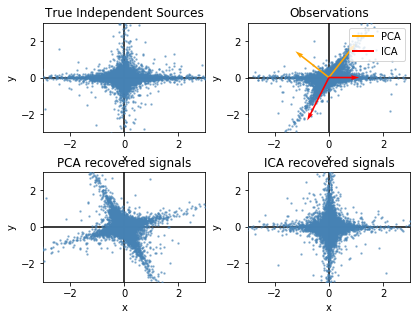

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, FastICA

# two Student T tests with hight degrees of freedom
rng = np.random.RandomState(42) # initialize the Mersenne Twister randomg number generator
S = rng.standard_t(1.5, size=(20000, 2))
S[:, 0] *= 2.

# Mix data
A = np.array([[1, 1], [0, 2]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Train PCA and Fast ICA
pca = PCA()
S_pca_ = pca.fit(X).transform(X)
ica = FastICA(random_state=rng)
S_ica_ = ica.fit(X).transform(X)  # Estimate the sources
S_ica_ /= S_ica_.std(axis=0)


# Plot results
def plot_samples(S, axis_list=None):
    plt.scatter(S[:, 0], S[:, 1], s=2, marker='o', zorder=10,
                color='steelblue', alpha=0.5)
    if axis_list is not None:
        colors = ['orange', 'red']
        for color, axis in zip(colors, axis_list):
            axis /= axis.std()
            x_axis, y_axis = axis
            # Trick to get legend to work
            plt.plot(0.1 * x_axis, 0.1 * y_axis, linewidth=2, color=color)
            plt.quiver(0, 0, x_axis, y_axis, zorder=11, width=0.01, scale=6,
                       color=color)
    plt.hlines(0, -3, 3)
    plt.vlines(0, -3, 3)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.xlabel('x')
    plt.ylabel('y')

plt.figure()
plt.subplot(2, 2, 1)
plot_samples(S / S.std())
plt.title('True Independent Sources')

axis_list = [pca.components_.T, ica.mixing_]
plt.subplot(2, 2, 2)
plot_samples(X / np.std(X), axis_list=axis_list)
legend = plt.legend(['PCA', 'ICA'], loc='upper right')
legend.set_zorder(100)

plt.title('Observations')

plt.subplot(2, 2, 3)
plot_samples(S_pca_ / np.std(S_pca_, axis=0))
plt.title('PCA recovered signals')

plt.subplot(2, 2, 4)
plot_samples(S_ica_ / np.std(S_ica_))
plt.title('ICA recovered signals')

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.36)
plt.show()

## FA
### Factor Analysis

- Unique variance: Some variance is unique to the variable under examination. It cannot be associated to what happens to any other variable.
- Shared variance: Some variance is shared with one or more other variables, creating redundancy in the data. Redundancy implies that you can find the same information, with slightly different values, in various features and across many observations.

Bellow, the components_ attribute, returns an array containing measures of the relationship between the newly created factors, placed in rows, and the original features, placed in columns. Higher positive scores correspond with factors being positively associated with the features. In this case, although we fit the factor model based on four components, only two components seem to fit the dataset.

Factor analysis uses an expectation maximization (EM) optimizer to find the best Gaussian distribution that can accurately model your data within a tolerance of n_tolerance. In simple terms n_components is the dimensionality of the Gaussian distribution.

In [2]:
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis
iris = load_iris()
X, y = iris.data, iris.target
factor = FactorAnalysis(n_components=4, random_state=101).fit(X)

In [6]:
import pandas as pd
pd.DataFrame(factor.components_,columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.707227,-0.153147,1.653151,0.701569
1,0.114676,0.159763,-0.045604,-0.014052
2,-0.000000,0.000000,0.000000,0.000000
3,-0.000000,0.000000,0.000000,-0.000000


Further read:
- https://en.wikipedia.org/wiki/Multiple_factor_analysis
- https://en.wikipedia.org/wiki/Factor_analysis_of_mixed_data
- https://blog.dominodatalab.com/how-to-do-factor-analysis/

## tSNE

> It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

While [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) can be useful for DR, it is considered more useful as a visualization technique in classification problems. One of the prize winning creators maintains a [website](https://lvdmaaten.github.io/tsne/) with native calls to his implementation in multiple languages including python, but scikit-learn also has an implementation available.

- http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
- http://scikit-learn.org/stable/modules/manifold.html#t-sne

One of the most popular demo is the classification of the MINST digit data.

In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

print(X.shape, y.shape)

(70000, 784) (70000,)


In [2]:
import pandas as pd

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))
#X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


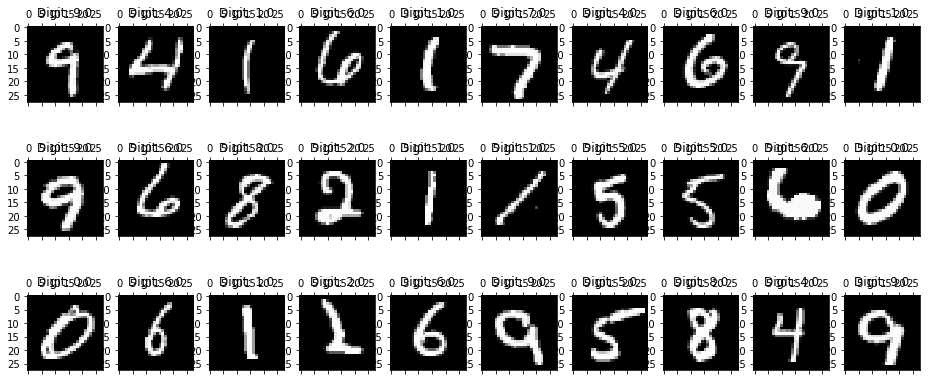

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])
# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title='Digit: ' + str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [ 0.09746116  0.07155445  0.06149531]


/home/sergiu/programs/miniconda3/envs/pycourse/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/sergiu/programs/miniconda3/envs/pycourse/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/sergiu/programs/miniconda3/envs/pycourse/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


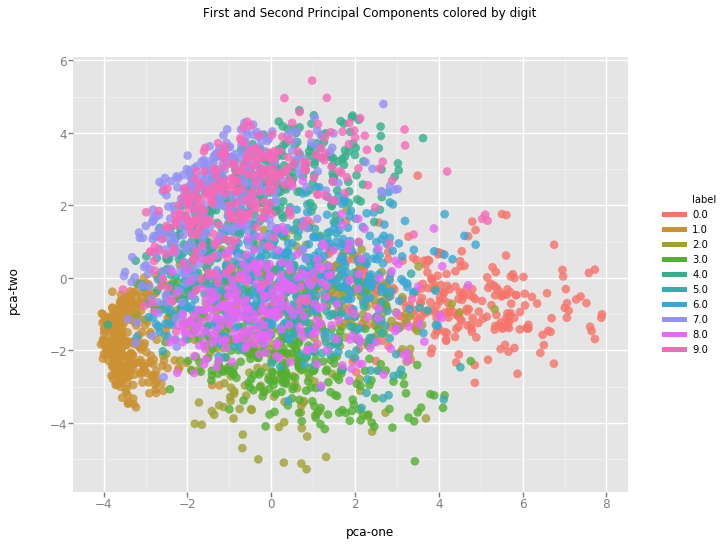

<ggplot: (-9223363294576354244)>

In [5]:
from ggplot import *

chart = ggplot( df.loc[rndperm[:3000],:], aes(x='pca-one', y='pca-two', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

In [6]:
import time

from sklearn.manifold import TSNE

n_sne = 3000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=250)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne],feat_cols].values)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.060s...
[t-SNE] Computed neighbors for 3000 samples in 9.019s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 2.476748
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.211365
[t-SNE] Error after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000
t-SNE done! Time elapsed: 21.337297201156616 seconds


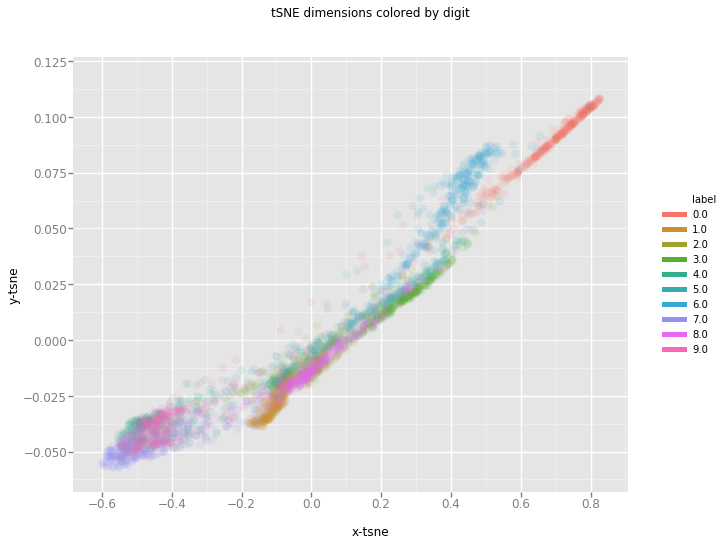

<ggplot: (-9223363294576444065)>

In [7]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart

Task:
- Plot the tSNE results on Seaborn or matplotlib rather than ggplot!

Further reading:
- The original blogpost covering the application of t-SNE: https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
- Author website, https://lvdmaaten.github.io/tsne/
- tSNE is notoriously difficult to interpret, for a list of caveats see https://distill.pub/2016/misread-tsne/